<a href="https://colab.research.google.com/github/RaoSaeed836/100_Day-s_DL/blob/main/Transfer_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dset",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dset",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 15 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [32]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(3, activation='softmax')  # 3 classes: apple, dog, car
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4667 - loss: 1.2016

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4667 - loss: 1.2016 - val_accuracy: 1.0000 - val_loss: 0.7082
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5333 - loss: 1.0772 - val_accuracy: 0.3333 - val_loss: 0.8939
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5333 - loss: 0.7662 - val_accuracy: 0.6667 - val_loss: 0.5632
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step - accuracy: 0.8000 - loss: 0.6254 - val_accuracy: 1.0000 - val_loss: 0.4725
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 0.9333 - loss: 0.5345 - val_accuracy: 1.0000 - val_loss: 0.3665
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step - accuracy: 1.0000 - loss: 0.3794 - val_accuracy: 1.0000 - val_loss: 0.3898
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9333 - loss: 0.3345 - val_accuracy: 1.0000 - val_loss: 0.2229
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.2787 - val_accuracy: 1.0000 - val_loss: 0.2471
Epoch 9/100

KeyboardInterrupt: 

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/building.jpeg', target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Class: [1]


In [16]:
import matplotlib.pyplot as plt


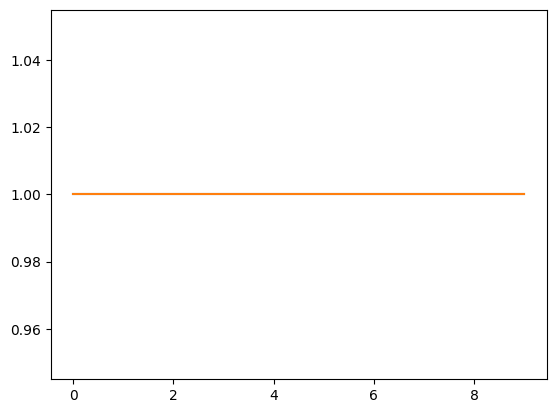

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

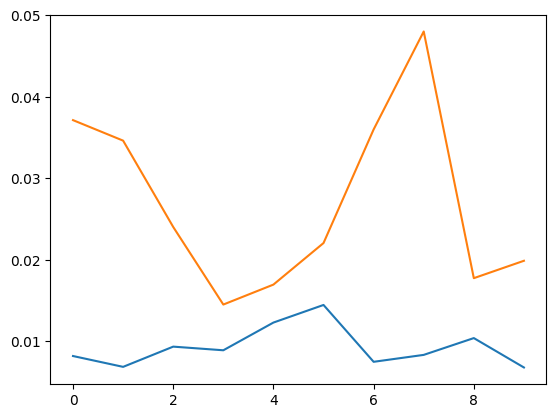

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])